# **Abstract**

El presente proyecto se enmarca en el análisis exploratorio de datos (EDA) utilizando un dataset sobre calidad de vinos rojos, conocido como “Wine Quality Dataset”. Este conjunto de datos proviene de estudios realizados para modelar la calidad del vino en función de diversas propiedades físico-químicas, como el contenido de alcohol, el pH, la acidez volátil, el dióxido de azufre y otros parámetros químicos. El dataset cuenta con más de 4000 entradas y 13 variables, incluyendo una variable objetivo categórica llamada quality, que indica el nivel de calidad percibida del vino en una escala del 0 al 10.

El objetivo principal de este trabajo es explorar las relaciones entre las distintas variables que componen el dataset y evaluar cuáles de ellas tienen mayor impacto en la calidad del vino. A partir de este análisis, se busca formular hipótesis y responder preguntas orientadas a identificar los factores que podrían predecir la calidad de un vino de forma objetiva. Se utilizarán herramientas de visualización univariada, bivariada y multivariada, acompañadas de resúmenes estadísticos descriptivos para obtener insights relevantes. También se evaluará la presencia de valores perdidos y su posible tratamiento.

Este tipo de análisis resulta de gran utilidad en la industria vitivinícola, donde la evaluación sensorial suele tener un alto componente subjetivo. La posibilidad de modelar la calidad del producto a partir de **variables** medibles aporta valor tanto en procesos de control de calidad como en decisiones de producción y mejora de productos.

En resumen, se busca comprender qué patrones subyacen en la composición química del vino y cómo estos se asocian con la percepción de calidad, brindando una mirada analítica que combine ciencia de datos con enología.

## Diccionario de variables

A continuación se describen las variables incluidas en el dataset:

- `fixed acidity`: cantidad de ácidos no volátiles presentes en el vino (tartárico, málico).
- `volatile acidity`: cantidad de ácidos volátiles, principalmente ácido acético; en exceso puede afectar negativamente el aroma.
- `citric acid`: ácido cítrico, aporta frescura al vino.
- `residual sugar`: cantidad de azúcar que queda después de la fermentación.
- `chlorides`: contenido de cloruros (sal), en grandes cantidades afecta el sabor.
- `free sulfur dioxide`: cantidad de SO₂ libre, útil para prevenir la oxidación microbiana.
- `total sulfur dioxide`: SO₂ total presente (libre y combinado).
- `density`: densidad del vino, relacionada con el contenido de azúcar y alcohol.
- `pH`: nivel de acidez; valores bajos indican mayor acidez.
- `sulphates`: compuestos que contribuyen al sabor y conservación del vino.
- `alcohol`: contenido de alcohol (%).
- `quality`: puntuación de calidad del vino dada por expertos (de 0 a 10) según catas sensoriales, teniendo en cuenta factores como el sabor, aroma, cuerpo, persistencia y equilibrio general del vino.
- `Id`: identificador único de cada observación (no relevante para el análisis).


In [5]:
#Importamos el dataset

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
#Importamos las librerías

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mlp

#Leemos el dataset

# Ruta al archivo Google Drive
ruta = '/content/drive/MyDrive/Colab Notebooks/dataframes/WineQT.csv'

# Cargamos el CSV en el DataFrame
df = pd.read_csv(ruta)

# Vemos las filas del dataset
df.head(13)


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4
5,7.4,0.660,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5
6,7.9,0.600,0.06,1.6,0.069,15.0,59.0,0.9964,3.30,0.46,9.4,5,6
7,7.3,0.650,0.00,1.2,0.065,15.0,21.0,0.9946,3.39,0.47,10.0,7,7
8,7.8,0.580,0.02,2.0,0.073,9.0,18.0,0.9968,3.36,0.57,9.5,7,8
9,6.7,0.580,0.08,1.8,0.097,15.0,65.0,0.9959,3.28,0.54,9.2,5,10


In [7]:
#Mostrar valores nulos

print('Valores nulos del conjunto de datos')
print(pd.isnull(df).sum())

Valores nulos del conjunto de datos
fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64


## Análisis Exploratorio de Datos

En esta sección se llevará a cabo una exploración inicial del dataset con el objetivo de conocer el comportamiento de las variables, identificar posibles valores atípicos y establecer relaciones que puedan sustentar futuras hipótesis.

Se analizarán distribuciones, estadísticas descriptivas y patrones entre variables físico-químicas del vino, prestando especial atención a aquellas que podrían tener una relación directa con la calidad (`quality`). También se evaluará la presencia de valores perdidos y se justificará el tratamiento aplicado.

Este análisis será clave para definir preguntas de interés que permitan orientar el trabajo analítico hacia conclusiones relevantes en términos de percepción sensorial y propiedades del producto.


In [8]:
#Obtenemos un resumen estadístico de las variables numéricas del dataset.

df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
count,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000,1143.000000
mean,8.311111,0.531339,0.268364,2.532152,0.086933,15.615486,45.914698,0.996730,3.311015,0.657708,10.442111,5.657043,804.969379
std,1.747595,0.179633,0.196686,1.355917,0.047267,10.250486,32.782130,0.001925,0.156664,0.170399,1.082196,0.805824,463.997116
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000,0.000000
25%,7.100000,0.392500,0.090000,1.900000,0.070000,7.000000,21.000000,0.995570,3.205000,0.550000,9.500000,5.000000,411.000000
50%,7.900000,0.520000,0.250000,2.200000,0.079000,13.000000,37.000000,0.996680,3.310000,0.620000,10.200000,6.000000,794.000000
75%,9.100000,0.640000,0.420000,2.600000,0.090000,21.000000,61.000000,0.997845,3.400000,0.730000,11.100000,6.000000,1209.500000
max,15.900000,1.580000,1.000000,15.500000,0.611000,68.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000,1597.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


## Análisis de valores atípicos

Para evaluar la presencia de valores extremos que pudieran distorsionar los análisis posteriores, se graficaron boxplots de algunas variables clave. Se observan valores atípicos principalmente en las variables `total sulfur dioxide`, `residual sugar`, `volatile acidity` y `chlorides`, lo cual es esperable en un dataset químico, donde pequeñas proporciones pueden tener un gran impacto.

En principio, se conservarán los outliers ya que no parecen errores de carga, sino variabilidad propia del producto. No obstante, se tendrá en cuenta su presencia al momento de interpretar gráficos y tendencias.



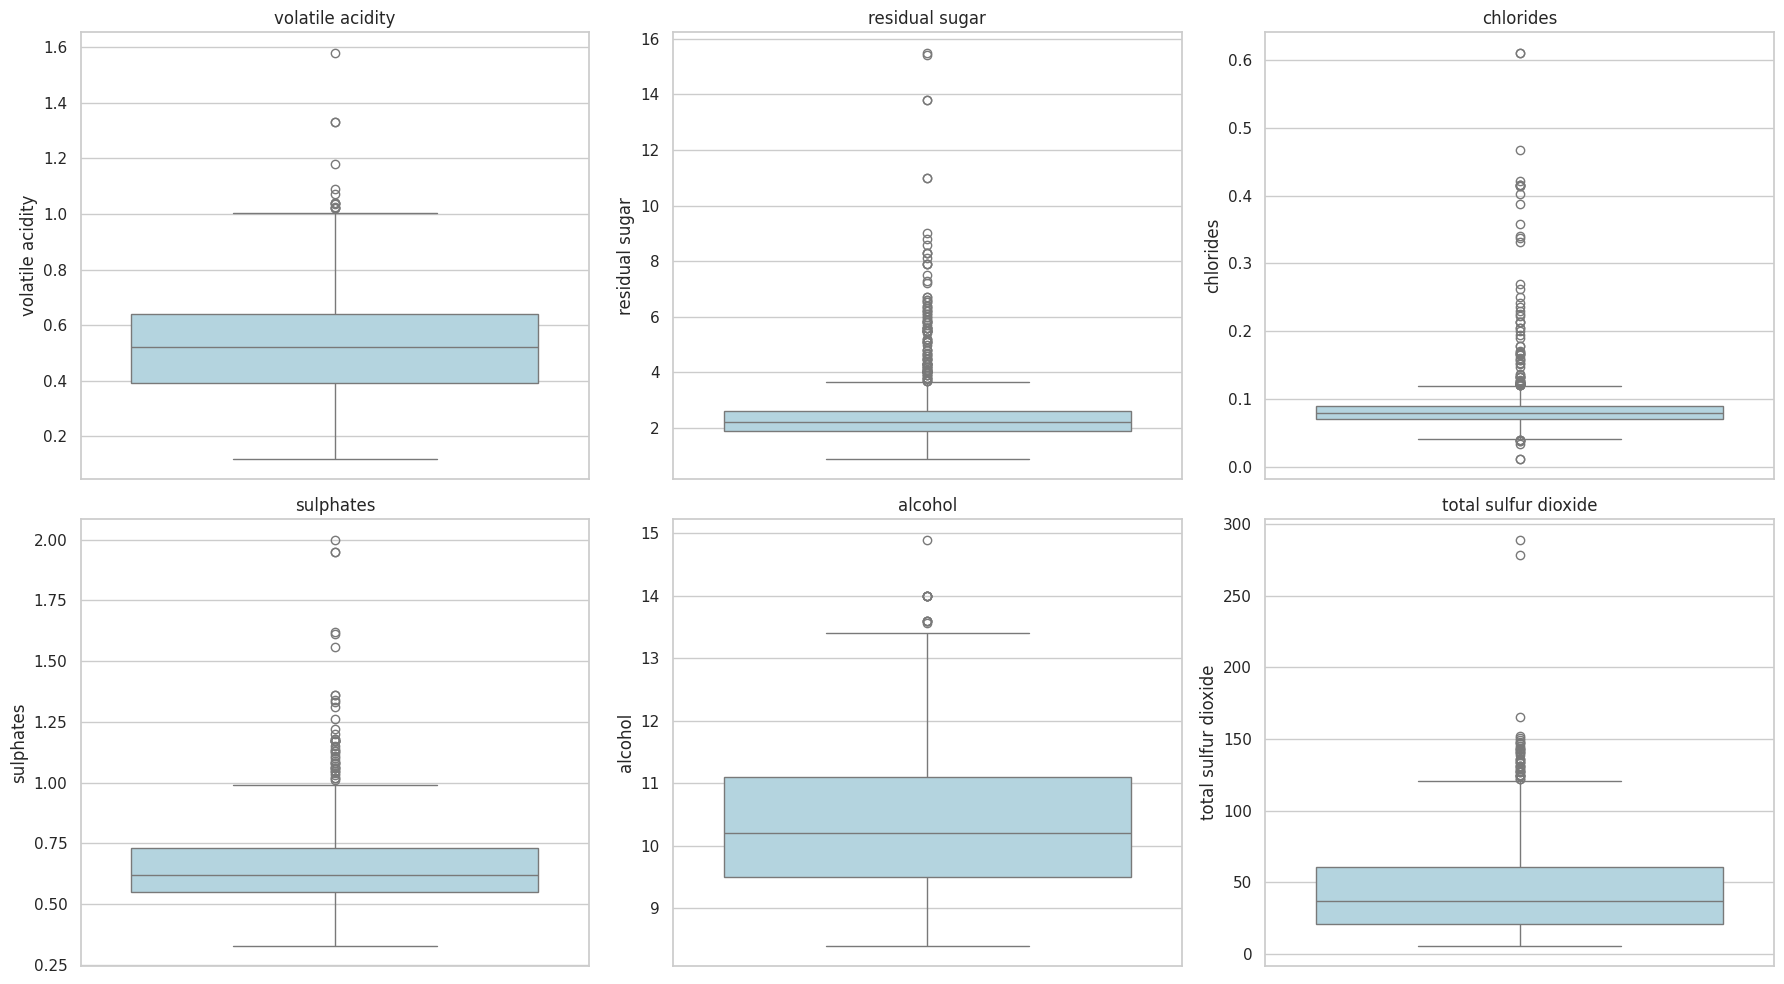

In [13]:
# Variables candidatas a outliers
columnas = ['volatile acidity', 'residual sugar', 'chlorides',
            'sulphates', 'alcohol', 'total sulfur dioxide']

# Gráficos
plt.figure(figsize=(18, 10))
for i, col in enumerate(columnas):
    plt.subplot(2, 3, i+1)
    sns.boxplot(y=df[col], color='lightblue')
    plt.title(f'{col}')
    plt.tight_layout()

Al obtener los boxplots correspondientes, se observaron outliers relevantes en variables clave del dataset:

- `volatile acidity` y `residual sugar` presentan valores extremos hacia arriba, lo que podría indicar vinos con perfiles inusuales, más ácidos o más dulces, respectivamente.
- `chlorides` y `sulphates` también muestran dispersión, aunque en menor escala.
- En `alcohol`, la distribución es más homogénea, lo cual facilita su análisis respecto a la calidad.
- Finalmente, `total sulfur dioxide` exhibe varios outliers, especialmente valores que superan ampliamente los 200, lo cual podría afectar tanto la estabilidad del vino como su perfil organoléptico.

Dado que los valores atípicos observados representan fenómenos posibles dentro del rango de producción vitivinícola (como vinos más alcohólicos, dulces o con más conservantes), se decidió **mantenerlos en el análisis**. No se identificaron errores evidentes de carga.

No obstante, en los gráficos se tendrá especial cuidado en cómo estos outliers podrían afectar la interpretación (por ejemplo, mediante escalas recortadas o transformaciones), con el objetivo de evitar conclusiones sesgadas por pocos casos extremos.



### Hipótesis 1: ¿El contenido de alcohol influye en la calidad del vino?

A partir del resumen estadístico (df.describe()), observamos que la variable alcohol tiene una media de 10.44% con un rango entre 8.4% y 14.9%. La dispersión es moderada y los valores extremos se mantienen dentro de lo esperable para vinos reales.

En el análisis de outliers mediante boxplots, se identificó que los valores de alcohol están bastante concentrados entre 9.5% y 11.5%, pero también existen vinos con mayor graduación, que podrían estar relacionados con una percepción de mayor calidad.


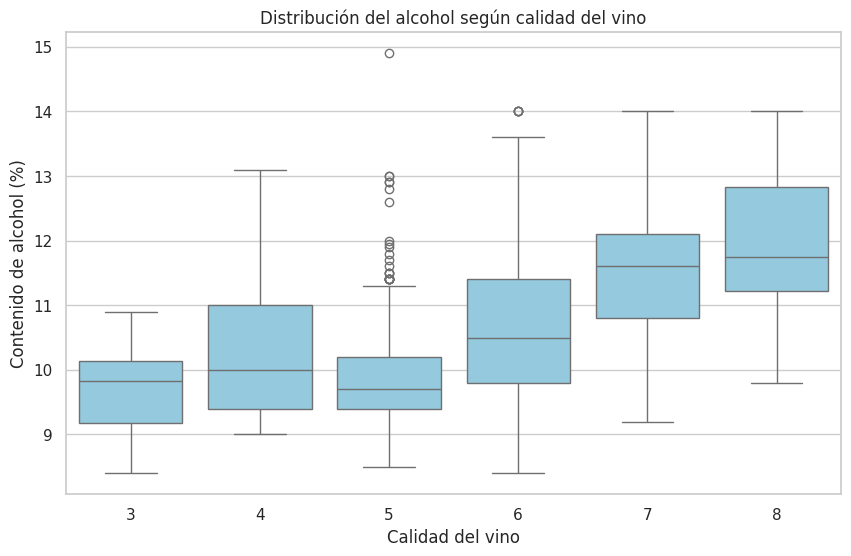

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# Gráfico de boxplot de alcohol según la calidad del vino
plt.figure(figsize=(10, 6))

# Queremos observar cómo varía el contenido de alcohol en función de la calidad percibida
# Este gráfico nos permitirá comparar la mediana y dispersión del alcohol dentro de cada nivel de calidad
sns.boxplot(x='quality', y='alcohol', data=df, color='skyblue')


plt.title('Distribución del alcohol según calidad del vino')
plt.xlabel('Calidad del vino')
plt.ylabel('Contenido de alcohol (%)')
plt.show()


El gráfico boxplot muestra la distribución del contenido de alcohol en función de la calidad del vino. A primera vista, se observa una **tendencia creciente**: a medida que aumenta la calidad del vino (de 3 a 8), también lo hace la mediana del contenido de alcohol.

- Los vinos con calidad **3, 4 y 5** tienen una mediana de alcohol que ronda los **10% o menos**, mientras que a partir de calidad **6** en adelante, las medianas superan esa marca.
- En particular, los vinos con calidad **8** presentan una mediana cercana al **12.5%**, lo que representa un aumento significativo respecto a los de menor puntuación.
- También se observa que el rango intercuartílico se amplía en los niveles de calidad más altos, indicando **más variabilidad en los vinos bien calificados**, lo cual puede reflejar diversidad en estilos o procesos de producción.
- Si bien hay outliers (especialmente en calidades intermedias), no distorsionan la tendencia general, que se mantiene ascendente.

Este análisis apoya la hipótesis planteada: **el contenido de alcohol parece estar positivamente relacionado con la calidad percibida del vino**. Desde un punto de vista enológico, esto podría explicarse por el impacto que el alcohol tiene en el cuerpo, la persistencia y la percepción general del producto.

# Hipótesis 2: ¿Los vinos con menor acidez volátil tienden a tener mejor calidad?

La variable `volatile acidity` representa la cantidad de ácidos volátiles presentes en el vino, principalmente ácido acético. Según el resumen estadístico, su media es 0.53, con valores que llegan hasta 1.58, lo cual es bastante elevado. En el análisis de boxplots se identificaron numerosos valores atípicos hacia la derecha, lo que indica que algunos vinos tienen una acidez volátil anormalmente alta.

En el mundo del vino, una alta acidez volátil suele relacionarse con defectos de elaboración o conservación. Por lo tanto, se plantea la siguiente hipótesis mencionada.

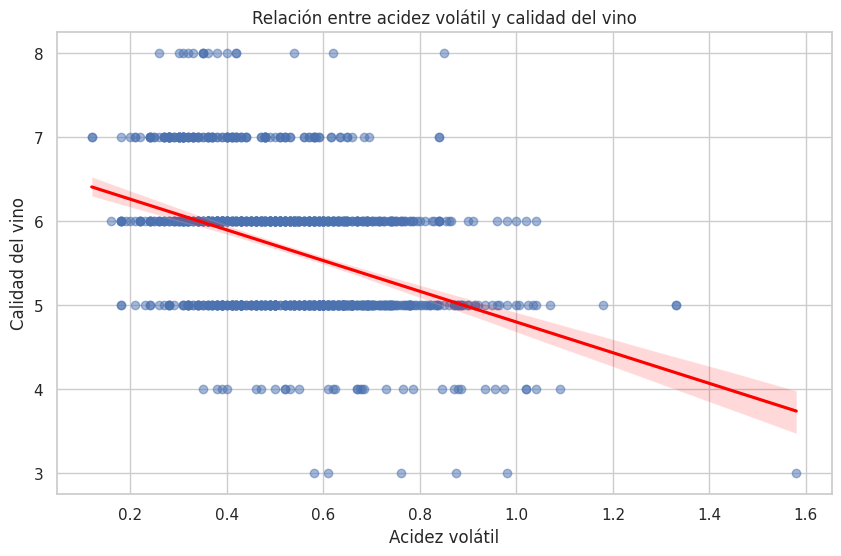

In [25]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión con línea de regresión lineal
# Nos permite ver si existe una relación inversa entre acidez volátil y calidad
sns.regplot(x='volatile acidity', y='quality', data=df, scatter_kws={'alpha':0.5}, line_kws={'color':'red'})

plt.title('Relación entre acidez volátil y calidad del vino')
plt.xlabel('Acidez volátil')
plt.ylabel('Calidad del vino')
plt.show()


Incorporando una línea de regresión al gráfico de dispersión, vemos como se evidencia una relación inversa entre la variable `volatile acidity` y la calidad del vino (`quality`). Se observa que, a medida que aumenta la acidez volátil, la calidad tiende a disminuir.

La línea de regresión presenta una **pendiente negativa**, lo cual respalda la hipótesis. Esto se alinea con el conocimiento enológico, ya que una acidez volátil elevada puede estar asociada a defectos de producción, oxidación o mala conservación, afectando negativamente el aroma y el sabor.

La dispersión de puntos también muestra que los vinos de baja calidad (3 a 5) presentan una mayor variabilidad en los niveles de acidez, mientras que los vinos de calidad más alta se concentran mayoritariamente en rangos bajos de `volatile acidity` (por debajo de 0.5).

Este patrón, junto con el análisis numérico previo y los outliers detectados en los boxplots, refuerza la idea de que la acidez volátil es una **variable clave a controlar** en la producción de vinos de mejor calidad.


# Hipótesis 2: ¿Los vinos con más sulfitos tienden a tener una calidad media-baja?

El dióxido de azufre total (`total sulfur dioxide`) es un conservante habitual en el vino. Si bien cumple funciones importantes, su exceso podría impactar negativamente en la experiencia sensorial, afectando el aroma y sabor del producto.

En el análisis estadístico y los boxplots previos, se identificaron valores de sulfitos totales que superan ampliamente los 200 mg/L, cuando el 75% de los casos no supera los 61 mg/L. Esto sugiere una fuerte dispersión en el uso de sulfitos.

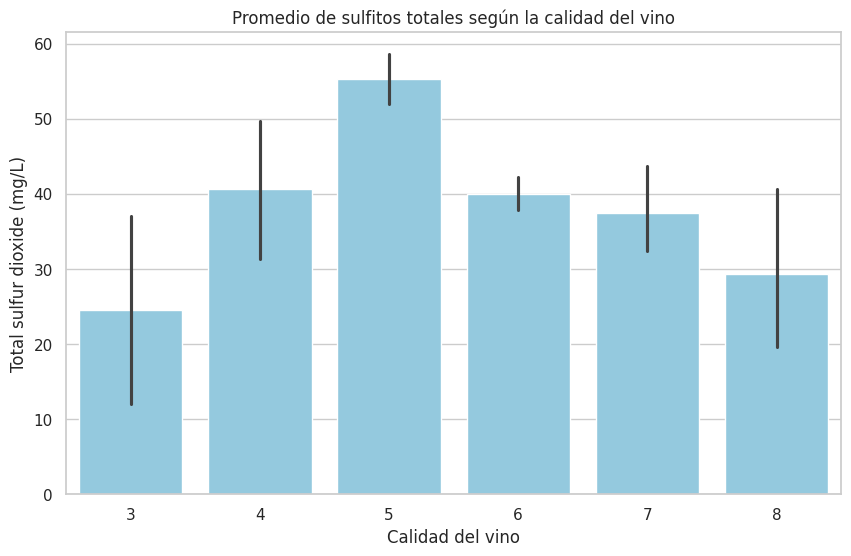

In [42]:
plt.figure(figsize=(10, 6))

# Gráfico de barras que muestra la media de sulfitos totales por nivel de calidad
# Útil para observar si los vinos mejor calificados usan menos sulfitos
sns.barplot(x='quality', y='total sulfur dioxide', data=df, color='skyblue')

plt.title('Promedio de sulfitos totales según la calidad del vino')
plt.xlabel('Calidad del vino')
plt.ylabel('Total sulfur dioxide (mg/L)')

plt.show()

In [43]:
#Veamos además la media por grupo

df.groupby('quality')['total sulfur dioxide'].mean()

,total sulfur dioxide
quality,
3,24.500000
4,40.606061
5,55.299172
6,39.941558
7,37.489510
8,29.375000


Se planteó la hipótesis de que los vinos con mayores niveles de dióxido de azufre total (`total sulfur dioxide`) serían aquellos con puntuaciones de calidad más bajas, ya que un exceso de sulfitos puede afectar negativamente el sabor y el aroma del vino.

El gráfico de barras muestra el promedio de sulfitos totales por nivel de calidad. Si bien los vinos con calificación **5** tienen el promedio más alto de sulfitos (alrededor de 55 mg/L), no se observa una tendencia lineal clara en los demás niveles. Por ejemplo, los vinos de calidad **4** tienen más sulfitos que los de calidad **3**, y los vinos de calidad **6 y 7** tienen niveles similares entre sí.

Llama la atención que los vinos de calidad **8** sí presentan niveles de sulfitos más bajos que los de calidad media, lo que puede sugerir que los mejores vinos tienden a usar menos conservantes. Sin embargo, el comportamiento no es uniforme en todos los grupos.

Por lo tanto, si bien hay indicios parciales que apoyan la hipótesis (especialmente en los extremos), **no puede afirmarse con contundencia** que exista una relación directa entre sulfitos y calidad percibida. Esto sugiere que el dióxido de azufre no es un factor determinante por sí solo, sino que probablemente interactúe con otras variables (como acidez, alcohol o técnica de elaboración) que también influyen en la evaluación sensorial del vino.


# Hipótesis 4: ¿Los vinos con mayor calidad presentan simultáneamente mayor contenido de alcohol y mayor cantidad de sulfatos?

A partir de los análisis previos se identificó que tanto el contenido de alcohol como la cantidad de `sulphates` (sulfatos) podrían estar relacionados positivamente con la calidad del vino.

El alcohol aporta cuerpo y persistencia, mientras que los sulfitos, además de su función conservante, pueden influir en aspectos como el aroma y el sabor. En este caso, nos interesa explorar si ambos factores combinados se asocian con vinos de mayor calidad.

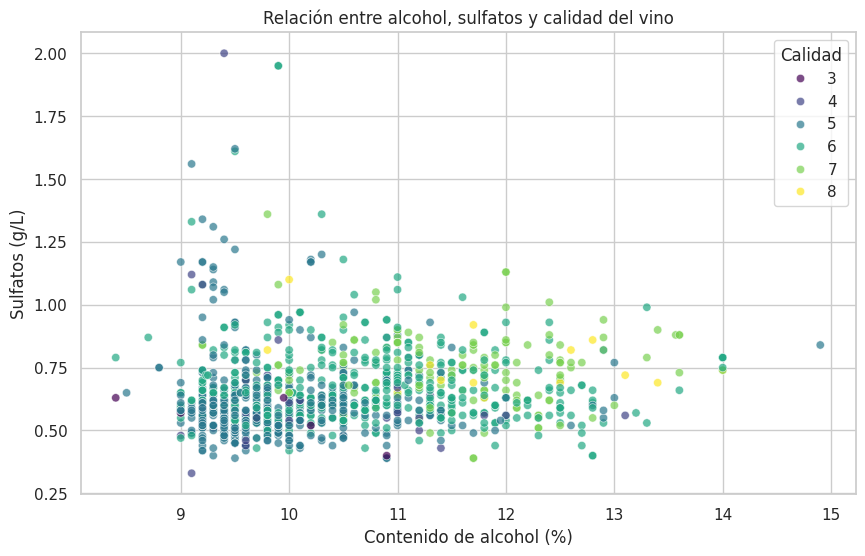

In [44]:
plt.figure(figsize=(10, 6))

# Gráfico de dispersión multivariado: alcohol vs sulphates, coloreado por calidad
# Queremos observar si los vinos de mayor calidad se agrupan en la zona de alto alcohol y alto contenido de sulfatos
sns.scatterplot(data=df, x='alcohol', y='sulphates', hue='quality', palette='viridis', alpha=0.7)

plt.title('Relación entre alcohol, sulfatos y calidad del vino')
plt.xlabel('Contenido de alcohol (%)')
plt.ylabel('Sulfatos (g/L)')
plt.legend(title='Calidad')
plt.show()


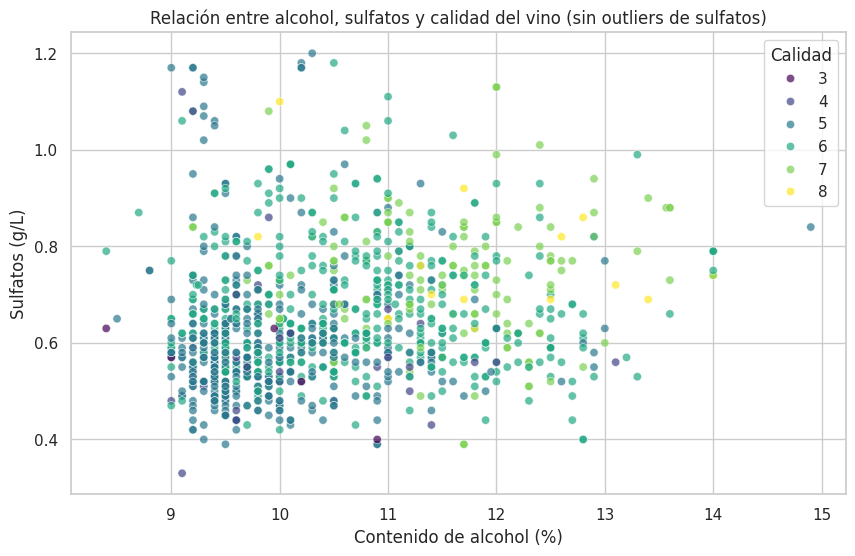

In [45]:
# Creamos una copia filtrada del dataset para visualizar sin outliers en sulphates
df_filtrado = df[(df['sulphates'] <= 1.2)]

plt.figure(figsize=(10, 6))

sns.scatterplot(data=df_filtrado, x='alcohol', y='sulphates', hue='quality', palette='viridis', alpha=0.7)

plt.title('Relación entre alcohol, sulfatos y calidad del vino (sin outliers de sulfatos)')
plt.xlabel('Contenido de alcohol (%)')
plt.ylabel('Sulfatos (g/L)')
plt.legend(title='Calidad')
plt.show()


Para facilitar la visualización de la concentración principal de observaciones (la "nube"), se eliminaron temporalmente del gráfico los vinos con niveles de `sulphates` mayores a 1.2 g/L, ya que representaban valores atípicos poco frecuentes que distorsionaban la escala del eje Y. Esta decisión se tomó únicamente con fines gráficos, sin eliminar datos del análisis general.

Con este recorte, se puede observar con mayor claridad la agrupación de vinos de calidad más alta (7 y 8) en la zona de alto alcohol y sulfatos moderadamente altos, lo que refuerza la hipótesis planteada.


En estos scatterplot multivariados vemos la relación entre el contenido de alcohol (`alcohol`), los niveles de sulfatos (`sulphates`) y la calidad del vino (`quality`). Cada punto representa un vino, posicionándose según su contenido de alcohol (eje X) y de sulfatos (eje Y), y coloreado por su nivel de calidad.

A simple vista, se puede observar que los vinos con **mayor calidad (7 y 8)** tienden a concentrarse en la parte **superior derecha del gráfico**, es decir, en zonas con **valores relativamente altos de alcohol y sulfatos**. Esta agrupación visual sugiere que ambos factores podrían estar asociados de manera conjunta con la calidad percibida.

En contraposición, los vinos con **calidad más baja (3 a 5)** están más distribuidos hacia la zona inferior izquierda, donde predominan niveles más bajos de alcohol y sulfatos. También se nota que la **densidad de puntos aumenta en la zona media**, lo cual es consistente con la mayoría de vinos del dataset teniendo calidad 5 o 6.

Si bien hay dispersión general (esperable en variables naturales), se valida parcialmente la hipótesis: los vinos de mayor calidad **no solo presentan más alcohol, sino que también tienden a tener más sulfatos**, aunque este último efecto es menos marcado.

Este análisis refuerza la importancia de observar múltiples variables al mismo tiempo, ya que el impacto combinado de alcohol y sulfatos parece más explicativo que si se los analizara por separado.
